In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

pd.pandas.set_option('display.max_columns', 100)
pd.pandas.set_option('display.max_columns', 25)

import os
import warnings
warnings.filterwarnings('ignore')

# RCParams
plt.rcParams['figure.figsize'] = [15,8]
# Display option
pd.options.display.float_format = '{:.2f}'.format

# Standard scalar
from sklearn.preprocessing import StandardScaler

# Dimensionality reduction
from sklearn.decomposition import PCA

# Pipeline
from sklearn.pipeline import Pipeline

#Label Encoder
from sklearn.preprocessing import LabelEncoder

# Train_testSplit
from sklearn.model_selection import train_test_split

# Cross validation
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, LeaveOneOut, RandomizedSearchCV

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# SVM Model
from sklearn.svm import SVC

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# KNN
from sklearn.neighbors import KNeighborsClassifier

# NaiveBayes - Gaussian
from sklearn.naive_bayes import GaussianNB

# Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
df =pd.read_csv('cancer.csv')
df.shape

(569, 33)

In [4]:
df.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80    1001.00   
1    842517         M        20.57         17.77          132.90    1326.00   
2  84300903         M        19.69         21.25          130.00    1203.00   
3  84348301         M        11.42         20.38           77.58     386.10   
4  84358402         M        20.29         14.34          135.10    1297.00   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0             0.12              0.28            0.30                 0.15   
1             0.08              0.08            0.09                 0.07   
2             0.11              0.16            0.20                 0.13   
3             0.14              0.28            0.24                 0.11   
4             0.10              0.13            0.20                 0.10   

   symmetry_mean  fractal_dimension_mean  ...  fractal_dimension_se  \
0           0.24                    0.08  ...                  0.01   
1           0.18                    0.06  ...                  0.00   
2           0.21                    0.06  ...                  0.00   
3           0.26                    0.10  ...                  0.01   
4           0.18                    0.06  ...                  0.01   

   radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0         25.38          17.33           184.60     2019.00              0.16   
1         24.99          23.41           158.80     1956.00              0.12   
2         23.57          25.53           152.50     1709.00              0.14   
3         14.91          26.50            98.87      567.70              0.21   
4         22.54          16.67           152.20     1575.00              0.14   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0               0.67             0.71                  0.27            0.46   
1               0.19             0.24                  0.19            0.28   
2               0.42             0.45                  0.24            0.36   
3               0.87             0.69                  0.26            0.66   
4               0.20             0.40                  0.16            0.24   

   fractal_dimension_worst  Unnamed: 32  
0                     0.12          NaN  
1                     0.09          NaN  
2                     0.09          NaN  
3                     0.17          NaN  
4                     0.08          NaN  

[5 rows x 33 columns]

## **Information about the dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## **Summarising the nummerical stats of the dataset**

In [6]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
count       569.00       569.00        569.00          569.00     569.00   
mean   30371831.43        14.13         19.29           91.97     654.89   
std   125020585.61         3.52          4.30           24.30     351.91   
min        8670.00         6.98          9.71           43.79     143.50   
25%      869218.00        11.70         16.17           75.17     420.30   
50%      906024.00        13.37         18.84           86.24     551.10   
75%     8813129.00        15.78         21.80          104.10     782.70   
max   911320502.00        28.11         39.28          188.50    2501.00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count           569.00            569.00          569.00               569.00   
mean              0.10              0.10            0.09                 0.05   
std               0.01              0.05            0.08                 0.04   
min               0.05              0.02            0.00                 0.00   
25%               0.09              0.06            0.03                 0.02   
50%               0.10              0.09            0.06                 0.03   
75%               0.11              0.13            0.13                 0.07   
max               0.16              0.35            0.43                 0.20   

       symmetry_mean  fractal_dimension_mean  radius_se  ...  \
count         569.00                  569.00     569.00  ...   
mean            0.18                    0.06       0.41  ...   
std             0.03                    0.01       0.28  ...   
min             0.11                    0.05       0.11  ...   
25%             0.16                    0.06       0.23  ...   
50%             0.18                    0.06       0.32  ...   
75%             0.20                    0.07       0.48  ...   
max             0.30                    0.10       2.87  ...   

       fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
count                569.00        569.00         569.00           569.00   
mean                   0.00         16.27          25.68           107.26   
std                    0.00          4.83           6.15            33.60   
min                    0.00          7.93          12.02            50.41   
25%                    0.00         13.01          21.08            84.11   
50%                    0.00         14.97          25.41            97.66   
75%                    0.00         18.79          29.72           125.40   
max                    0.03         36.04          49.54           251.20   

       area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count      569.00            569.00             569.00           569.00   
mean       880.58              0.13               0.25             0.27   
std        569.36              0.02               0.16             0.21   
min        185.20              0.07               0.03             0.00   
25%        515.30              0.12               0.15             0.11   
50%        686.50              0.13               0.21             0.23   
75%       1084.00              0.15               0.34             0.38   
max       4254.00              0.22               1.06             1.25   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count                569.00          569.00                   569.00   
mean                   0.11            0.29                     0.08   
std                    0.07            0.06                     0.02   
min                    0.00            0.16                     0.06   
25%                    0.06            0.25                     0.07   
50%                    0.10            0.28                     0.08   
75%                    0.16            0.32                     0.09   
max                    0.29            0.66                     0.21   

     

## **Finding the missing values in the dataset**

In [7]:
df.isnull()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    False      False        False         False           False      False   
1    False      False        False         False           False      False   
2    False      False        False         False           False      False   
3    False      False        False         False           False      False   
4    False      False        False         False           False      False   
..     ...        ...          ...           ...             ...        ...   
564  False      False        False         False           False      False   
565  False      False        False         False           False      False   
566  False      False        False         False           False      False   
567  False      False        False         False           False      False   
568  False      False        False         False           False      False   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0              False             False           False                False   
1              False             False           False                False   
2              False             False           False                False   
3              False             False           False                False   
4              False             False           False                False   
..               ...               ...             ...                  ...   
564            False             False           False                False   
565            False             False           False                False   
566            False             False           False                False   
567            False             False           False                False   
568            False             False           False                False   

     symmetry_mean  fractal_dimension_mean  ...  fractal_dimension_se  \
0            False                   False  ...                 False   
1            False                   False  ...                 False   
2            False                   False  ...                 False   
3            False                   False  ...                 False   
4            False                   False  ...                 False   
..             ...                     ...  ...                   ...   
564          False                   False  ...                 False   
565          False                   False  ...                 False   
566          False                   False  ...                 False   
567          False                   False  ...                 False   
568          False                   False  ...                 False   

     radius_worst  texture_worst  perimeter_worst  area_worst  \
0           False          False            False       False   
1           False          False            False       False   
2           False          False            False       False   
3           False          False            False       False   
4           False          False            False       False   
..            ...            ...              ...         ...   
564         False          False            False       False   
565         False          False            False       False   
566         False          False            False       False   
567         False          False            False       False   
568         False          False            False       False   

     smoothness_worst  compactness_worst  concavity_worst  \
0               False              False            False   
1               False              False            False   
2               False              False            False   
3               False              False            False   
4               False              False            False   
..                ...                ...              ...   
564             False    

In [8]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### **Dropping id and unnamed columns from the dataset**

In [9]:
df.drop(columns=['id','Unnamed: 32'], inplace=True, axis = 1)

In [10]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# **Exploratory Data Analysis**

### **Checking the valuecounts of the diagnosis**

In [11]:
diagnosis_ct  = df['diagnosis'].value_counts()
diagnosis_ct

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot: ylabel='diagnosis'>

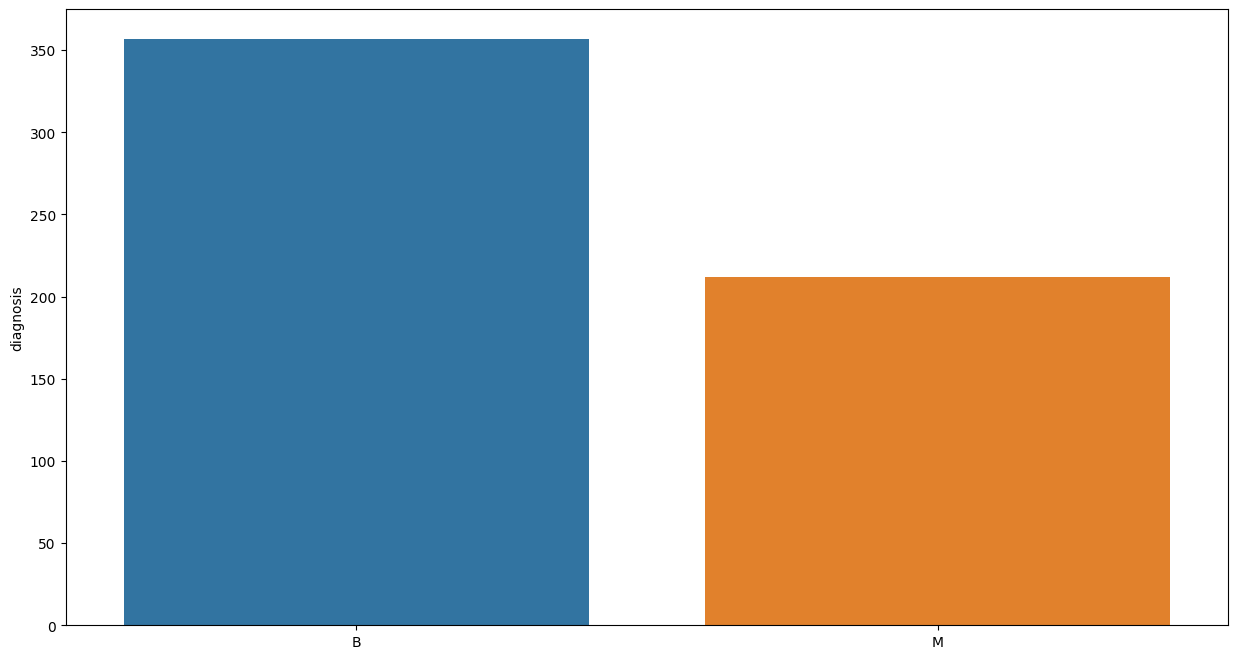

In [12]:
sns.barplot(y=diagnosis_ct, x=diagnosis_ct.index)

**M --> Malignant --> The patient is having cancer**

**B --> Benign --> The patient is not having cancer**

#### **Using label encoder to convert the value as numerical value**

In [13]:
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])
df['diagnosis'].tail()


564    1
565    1
566    1
567    1
568    0
Name: diagnosis, dtype: int32

**Now the value has been ecoded to numeric value**

**M --> 1 --> Malignant --> The patient is having cancer**

**B --> 0 --> Benign --> The patient is not having cancer**

### **Correlation**

In [14]:
df_corr = df.corr()
df_corr


diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                     1.00         0.73          0.42            0.74   
radius_mean                   0.73         1.00          0.32            1.00   
texture_mean                  0.42         0.32          1.00            0.33   
perimeter_mean                0.74         1.00          0.33            1.00   
area_mean                     0.71         0.99          0.32            0.99   
smoothness_mean               0.36         0.17         -0.02            0.21   
compactness_mean              0.60         0.51          0.24            0.56   
concavity_mean                0.70         0.68          0.30            0.72   
concave points_mean           0.78         0.82          0.29            0.85   
symmetry_mean                 0.33         0.15          0.07            0.18   
fractal_dimension_mean       -0.01        -0.31         -0.08           -0.26   
radius_se                     0.57         0.68          0.28            0.69   
texture_se                   -0.01        -0.10          0.39           -0.09   
perimeter_se                  0.56         0.67          0.28            0.69   
area_se                       0.55         0.74          0.26            0.74   
smoothness_se                -0.07        -0.22          0.01           -0.20   
compactness_se                0.29         0.21          0.19            0.25   
concavity_se                  0.25         0.19          0.14            0.23   
concave points_se             0.41         0.38          0.16            0.41   
symmetry_se                  -0.01        -0.10          0.01           -0.08   
fractal_dimension_se          0.08        -0.04          0.05           -0.01   
radius_worst                  0.78         0.97          0.35            0.97   
texture_worst                 0.46         0.30          0.91            0.30   
perimeter_worst               0.78         0.97          0.36            0.97   
area_worst                    0.73         0.94          0.34            0.94   
smoothness_worst              0.42         0.12          0.08            0.15   
compactness_worst             0.59         0.41          0.28            0.46   
concavity_worst               0.66         0.53          0.30            0.56   
concave points_worst          0.79         0.74          0.30            0.77   
symmetry_worst                0.42         0.16          0.11            0.19   
fractal_dimension_worst       0.32         0.01          0.12            0.05   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                     0.71             0.36              0.60   
radius_mean                   0.99             0.17              0.51   
texture_mean                  0.32            -0.02              0.24   
perimeter_mean                0.99             0.21              0.56   
area_mean                     1.00             0.18              0.50   
smoothness_mean               0.18             1.00              0.66   
compactness_mean              0.50             0.66              1.00   
concavity_mean                0.69             0.52              0.88   
concave points_mean           0.82             0.55              0.83   
symmetry_mean                 0.15             0.56              0.60   
fractal_dimension_mean       -0.28             0.58              0.57   
radius_se                     0.73             0.30              0.50   
texture_se                   -0.07             0.07              0.05   
perimeter_se                  0.73             0.30              0.55   
area_se                       0.80             0.25              0.46   
smoothness_se                -0.17             0.33              0.14   
compactness_se                0.21             0.32              0.74   
concavity_se                  0.21             0.25              0.57   
concave points_se             0.37           

<AxesSubplot: >

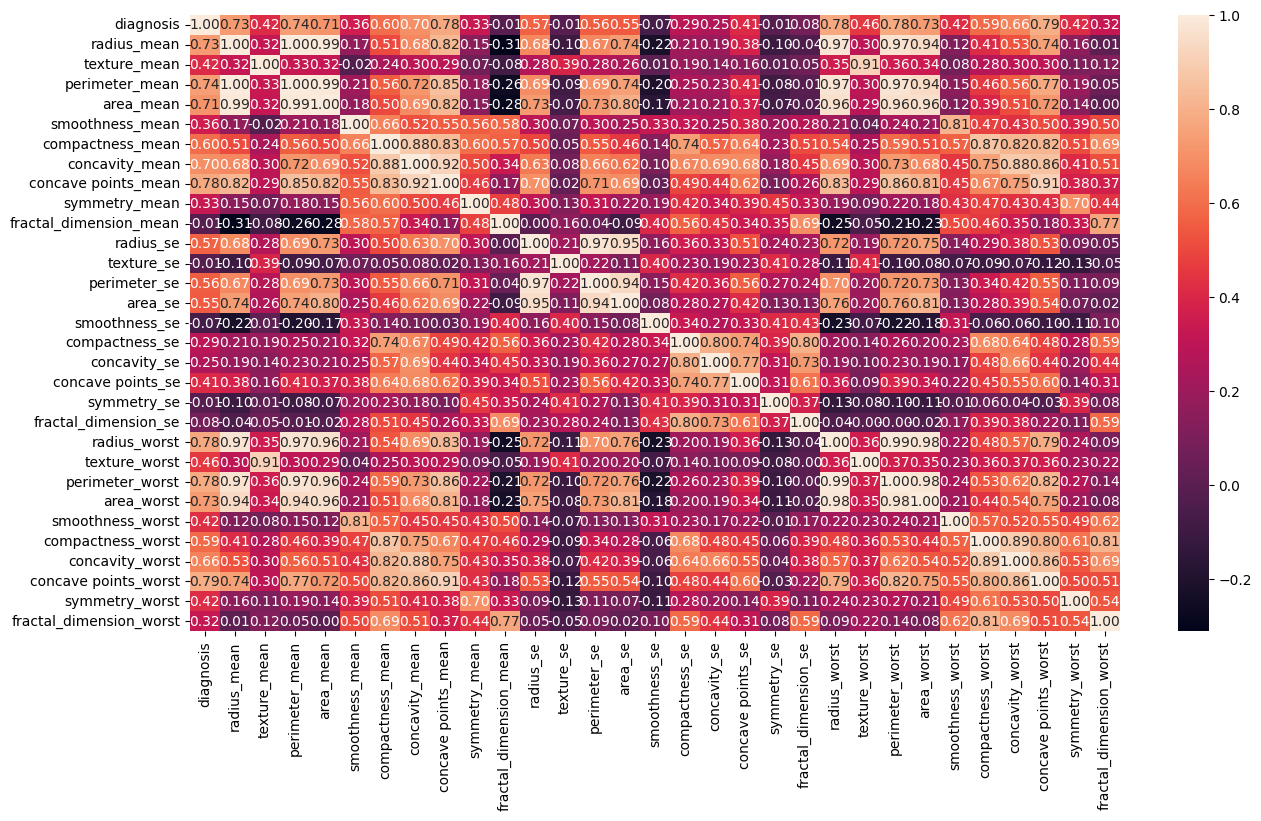

In [15]:
sns.heatmap(df_corr, annot=True, fmt='.2f')

### **Checking the correlation only for with mean values and diagnosis**

In [16]:
df_mean_val = df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
df_mean_val.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80    1001.00   
1          1        20.57         17.77          132.90    1326.00   
2          1        19.69         21.25          130.00    1203.00   
3          1        11.42         20.38           77.58     386.10   
4          1        20.29         14.34          135.10    1297.00   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0             0.12              0.28            0.30                 0.15   
1             0.08              0.08            0.09                 0.07   
2             0.11              0.16            0.20                 0.13   
3             0.14              0.28            0.24                 0.11   
4             0.10              0.13            0.20                 0.10   

   symmetry_mean  fractal_dimension_mean  
0           0.24                    0.08  
1           0.18                    0.06  
2           0.21                    0.06  
3           0.26                    0.10  
4           0.18                    0.06

In [17]:
mean_corr = df_mean_val.corr()
mean_corr

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                    1.00         0.73          0.42            0.74   
radius_mean                  0.73         1.00          0.32            1.00   
texture_mean                 0.42         0.32          1.00            0.33   
perimeter_mean               0.74         1.00          0.33            1.00   
area_mean                    0.71         0.99          0.32            0.99   
smoothness_mean              0.36         0.17         -0.02            0.21   
compactness_mean             0.60         0.51          0.24            0.56   
concavity_mean               0.70         0.68          0.30            0.72   
concave points_mean          0.78         0.82          0.29            0.85   
symmetry_mean                0.33         0.15          0.07            0.18   
fractal_dimension_mean      -0.01        -0.31         -0.08           -0.26   

                        area_mean  smoothness_mean  compactness_mean  \
diagnosis                    0.71             0.36              0.60   
radius_mean                  0.99             0.17              0.51   
texture_mean                 0.32            -0.02              0.24   
perimeter_mean               0.99             0.21              0.56   
area_mean                    1.00             0.18              0.50   
smoothness_mean              0.18             1.00              0.66   
compactness_mean             0.50             0.66              1.00   
concavity_mean               0.69             0.52              0.88   
concave points_mean          0.82             0.55              0.83   
symmetry_mean                0.15             0.56              0.60   
fractal_dimension_mean      -0.28             0.58              0.57   

                        concavity_mean  concave points_mean  symmetry_mean  \
diagnosis                         0.70                 0.78           0.33   
radius_mean                       0.68                 0.82           0.15   
texture_mean                      0.30                 0.29           0.07   
perimeter_mean                    0.72                 0.85           0.18   
area_mean                         0.69                 0.82           0.15   
smoothness_mean                   0.52                 0.55           0.56   
compactness_mean                  0.88                 0.83           0.60   
concavity_mean                    1.00                 0.92           0.50   
concave points_mean               0.92                 1.00           0.46   
symmetry_mean                     0.50                 0.46           1.00   
fractal_dimension_mean            0.34                 0.17           0.48   

                        fractal_dimension_mean  
diagnosis                                -0.01  
radius_mean                              -0.31  
texture_mean                             -0.08  
perimeter_mean                           -0.26  
area_mean                                -0.28  
smoothness_mean                           0.58  
compactness_mean                          0.57  
concavity_mean                            0.34  
concave points_mean                       0.17  
symmetry_mean                             0.48  
fractal_dimension_mean                    1.00

<AxesSubplot: >

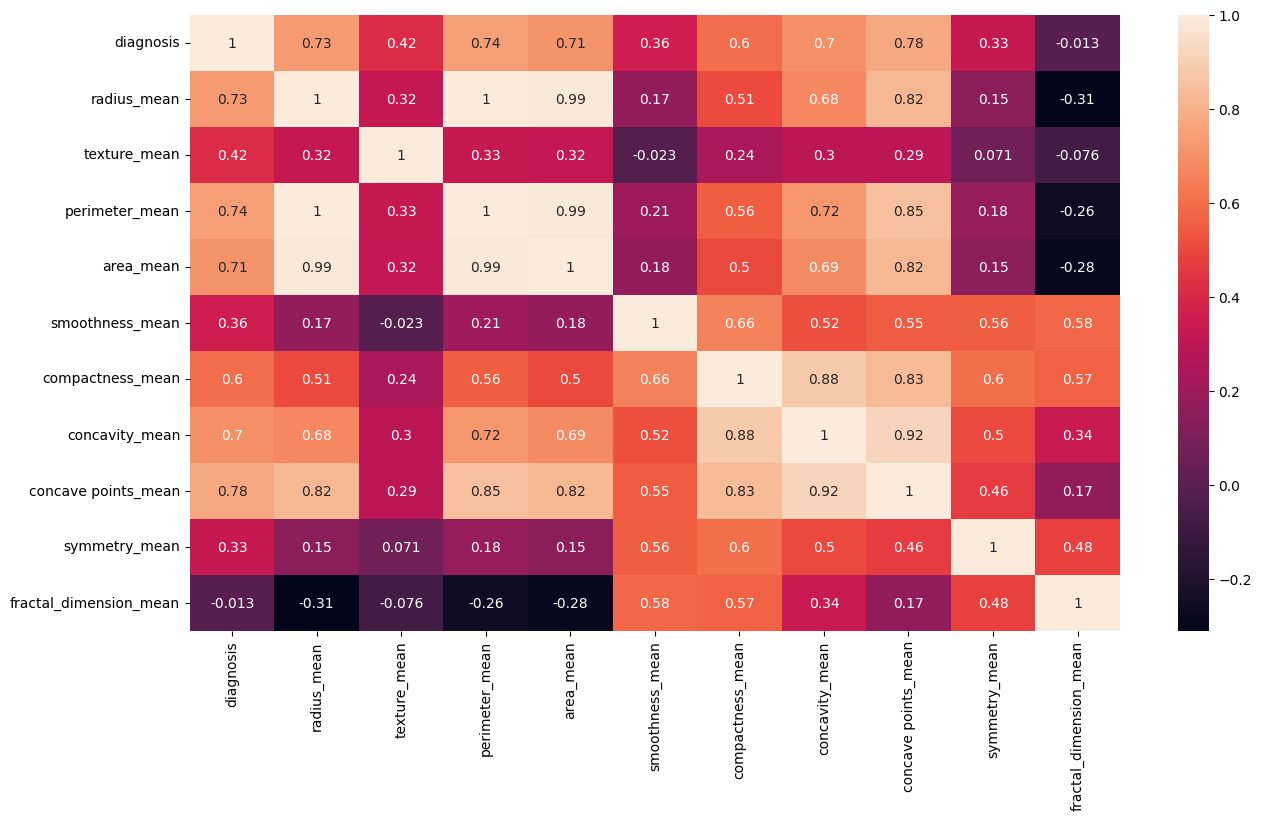

In [18]:
sns.heatmap(mean_corr,annot=True)

#### **Observations**

- area_mean, radius_mean and perimeter_mean are 99% correlated to each other
- concavity_mean and concavity_points_mean are 92% correlated

### **PairPlot**

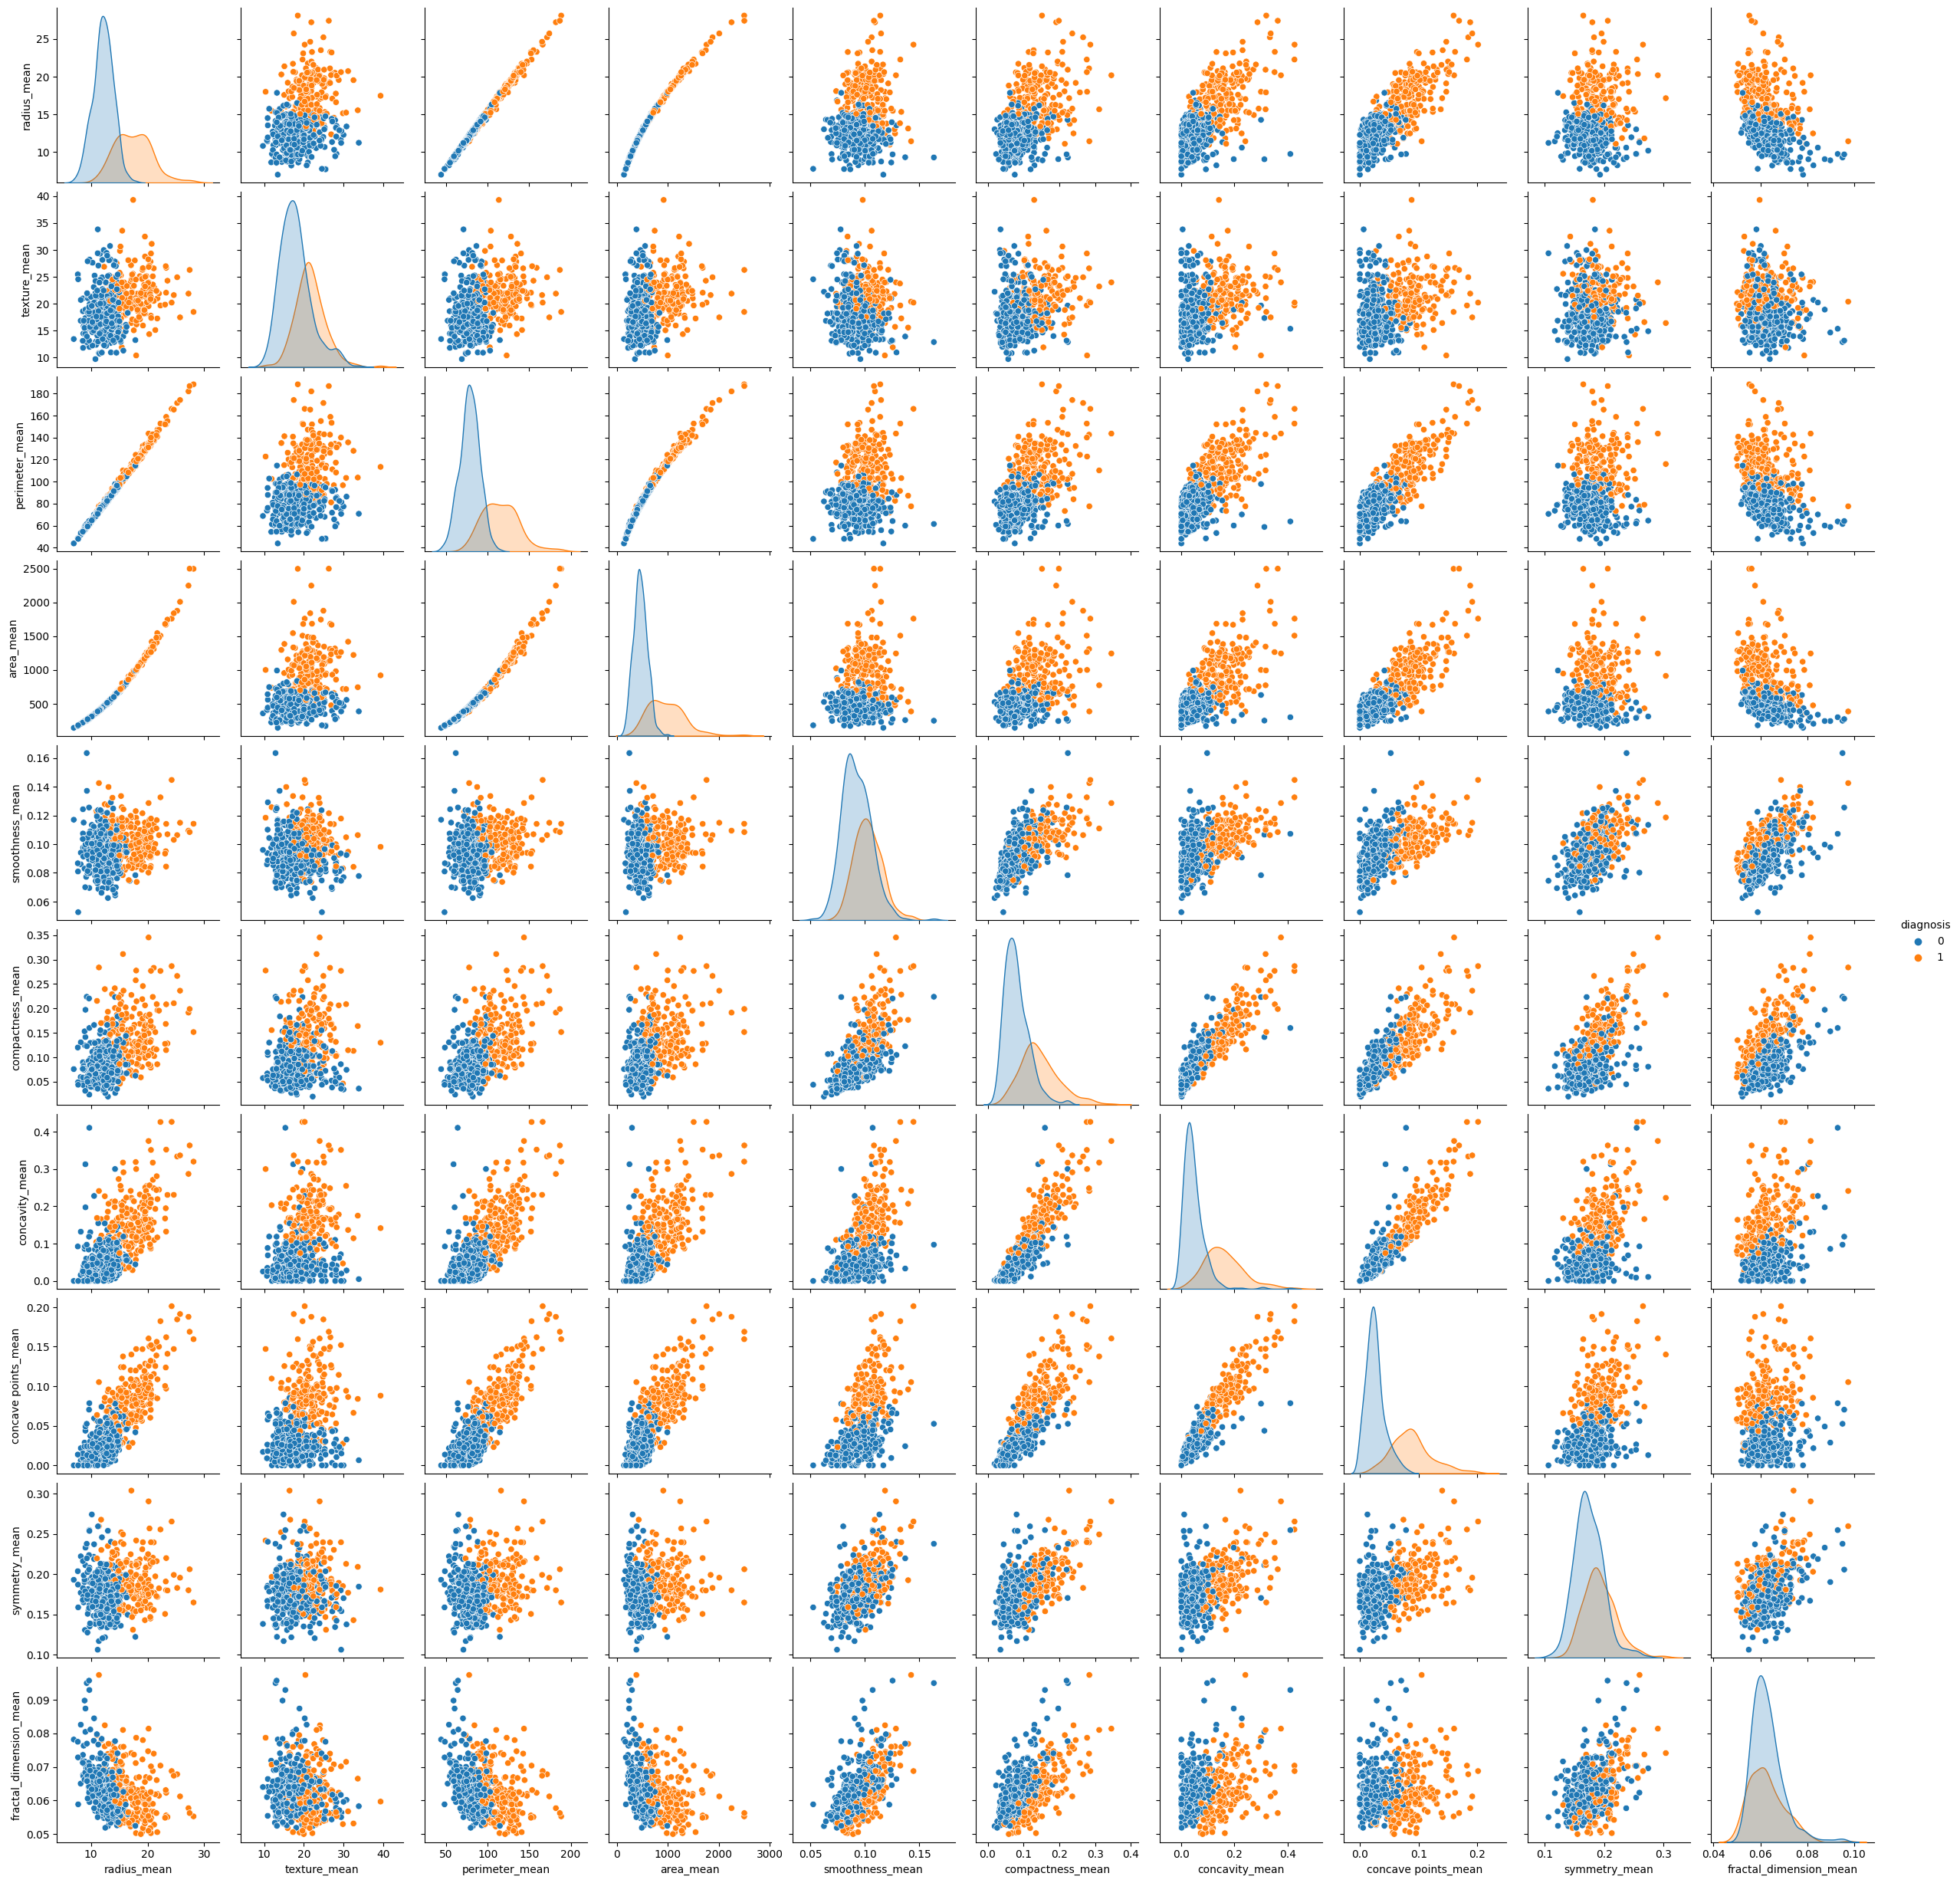

In [19]:
sns.pairplot(df_mean_val, hue='diagnosis')

### **Checking the correlation only for with Standard error values and diagnosis**

In [20]:
df_se_val = df[['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']]
df_se_val.head(5)

diagnosis  radius_se  texture_se  perimeter_se  area_se  smoothness_se  \
0          1       1.09        0.91          8.59   153.40           0.01   
1          1       0.54        0.73          3.40    74.08           0.01   
2          1       0.75        0.79          4.58    94.03           0.01   
3          1       0.50        1.16          3.44    27.23           0.01   
4          1       0.76        0.78          5.44    94.44           0.01   

   compactness_se  concavity_se  concave points_se  symmetry_se  \
0            0.05          0.05               0.02         0.03   
1            0.01          0.02               0.01         0.01   
2            0.04          0.04               0.02         0.02   
3            0.07          0.06               0.02         0.06   
4            0.02          0.06               0.02         0.02   

   fractal_dimension_se  
0                  0.01  
1                  0.00  
2                  0.00  
3                  0.01  
4                  0.01

In [21]:
se_corr = df_se_val.corr()
se_corr

diagnosis  radius_se  texture_se  perimeter_se  area_se  \
diagnosis                  1.00       0.57       -0.01          0.56     0.55   
radius_se                  0.57       1.00        0.21          0.97     0.95   
texture_se                -0.01       0.21        1.00          0.22     0.11   
perimeter_se               0.56       0.97        0.22          1.00     0.94   
area_se                    0.55       0.95        0.11          0.94     1.00   
smoothness_se             -0.07       0.16        0.40          0.15     0.08   
compactness_se             0.29       0.36        0.23          0.42     0.28   
concavity_se               0.25       0.33        0.19          0.36     0.27   
concave points_se          0.41       0.51        0.23          0.56     0.42   
symmetry_se               -0.01       0.24        0.41          0.27     0.13   
fractal_dimension_se       0.08       0.23        0.28          0.24     0.13   

                      smoothness_se  compactness_se  concavity_se  \
diagnosis                     -0.07            0.29          0.25   
radius_se                      0.16            0.36          0.33   
texture_se                     0.40            0.23          0.19   
perimeter_se                   0.15            0.42          0.36   
area_se                        0.08            0.28          0.27   
smoothness_se                  1.00            0.34          0.27   
compactness_se                 0.34            1.00          0.80   
concavity_se                   0.27            0.80          1.00   
concave points_se              0.33            0.74          0.77   
symmetry_se                    0.41            0.39          0.31   
fractal_dimension_se           0.43            0.80          0.73   

                      concave points_se  symmetry_se  fractal_dimension_se  
diagnosis                          0.41        -0.01                  0.08  
radius_se                          0.51         0.24                  0.23  
texture_se                         0.23         0.41                  0.28  
perimeter_se                       0.56         0.27                  0.24  
area_se                            0.42         0.13                  0.13  
smoothness_se                      0.33         0.41                  0.43  
compactness_se                     0.74         0.39                  0.80  
concavity_se                       0.77         0.31                  0.73  
concave points_se                  1.00         0.31                  0.61  
symmetry_se                        0.31         1.00                  0.37  
fractal_dimension_se               0.61         0.37                  1.00

<AxesSubplot: >

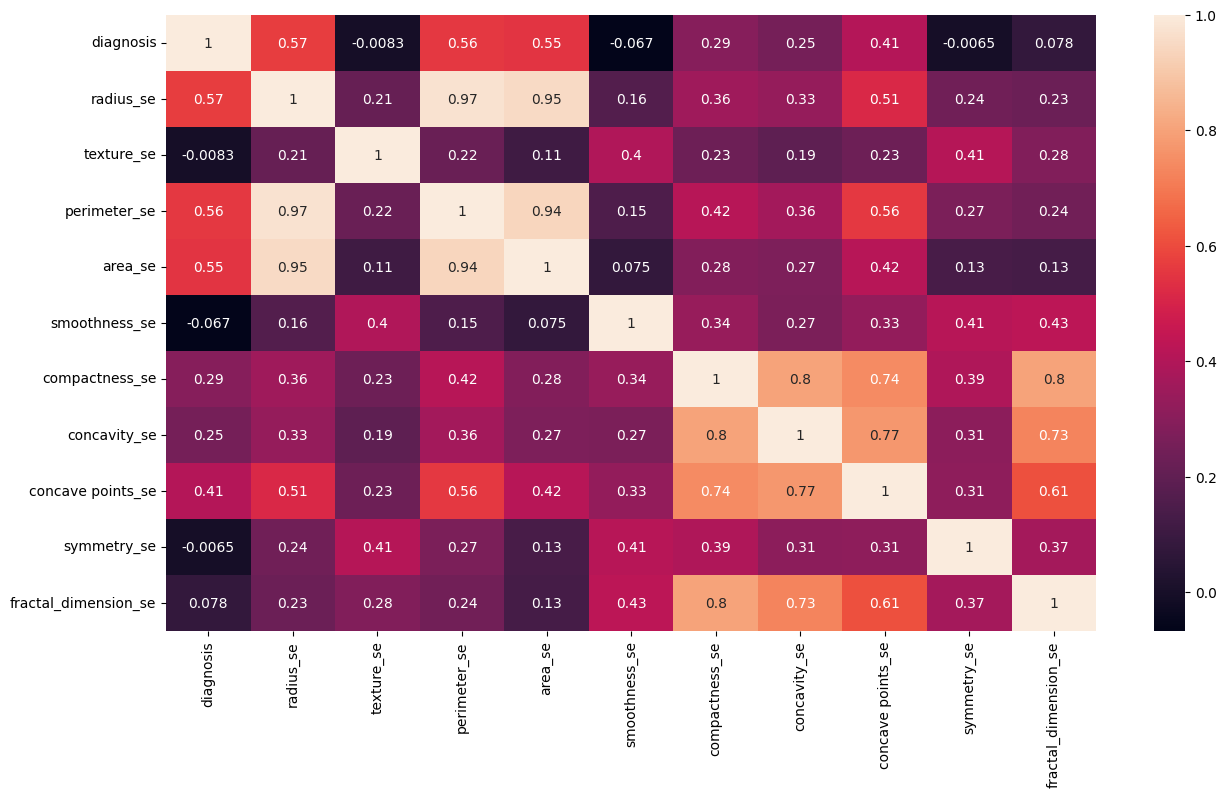

In [22]:
sns.heatmap(se_corr, annot=True)

#### **Observations**

- area_se and radius_se are 95% correlated
- Perimeter_se and radius_se are 97% correlated
- area_se and perimeter_se are are 94% correlated

### **PairPlot**

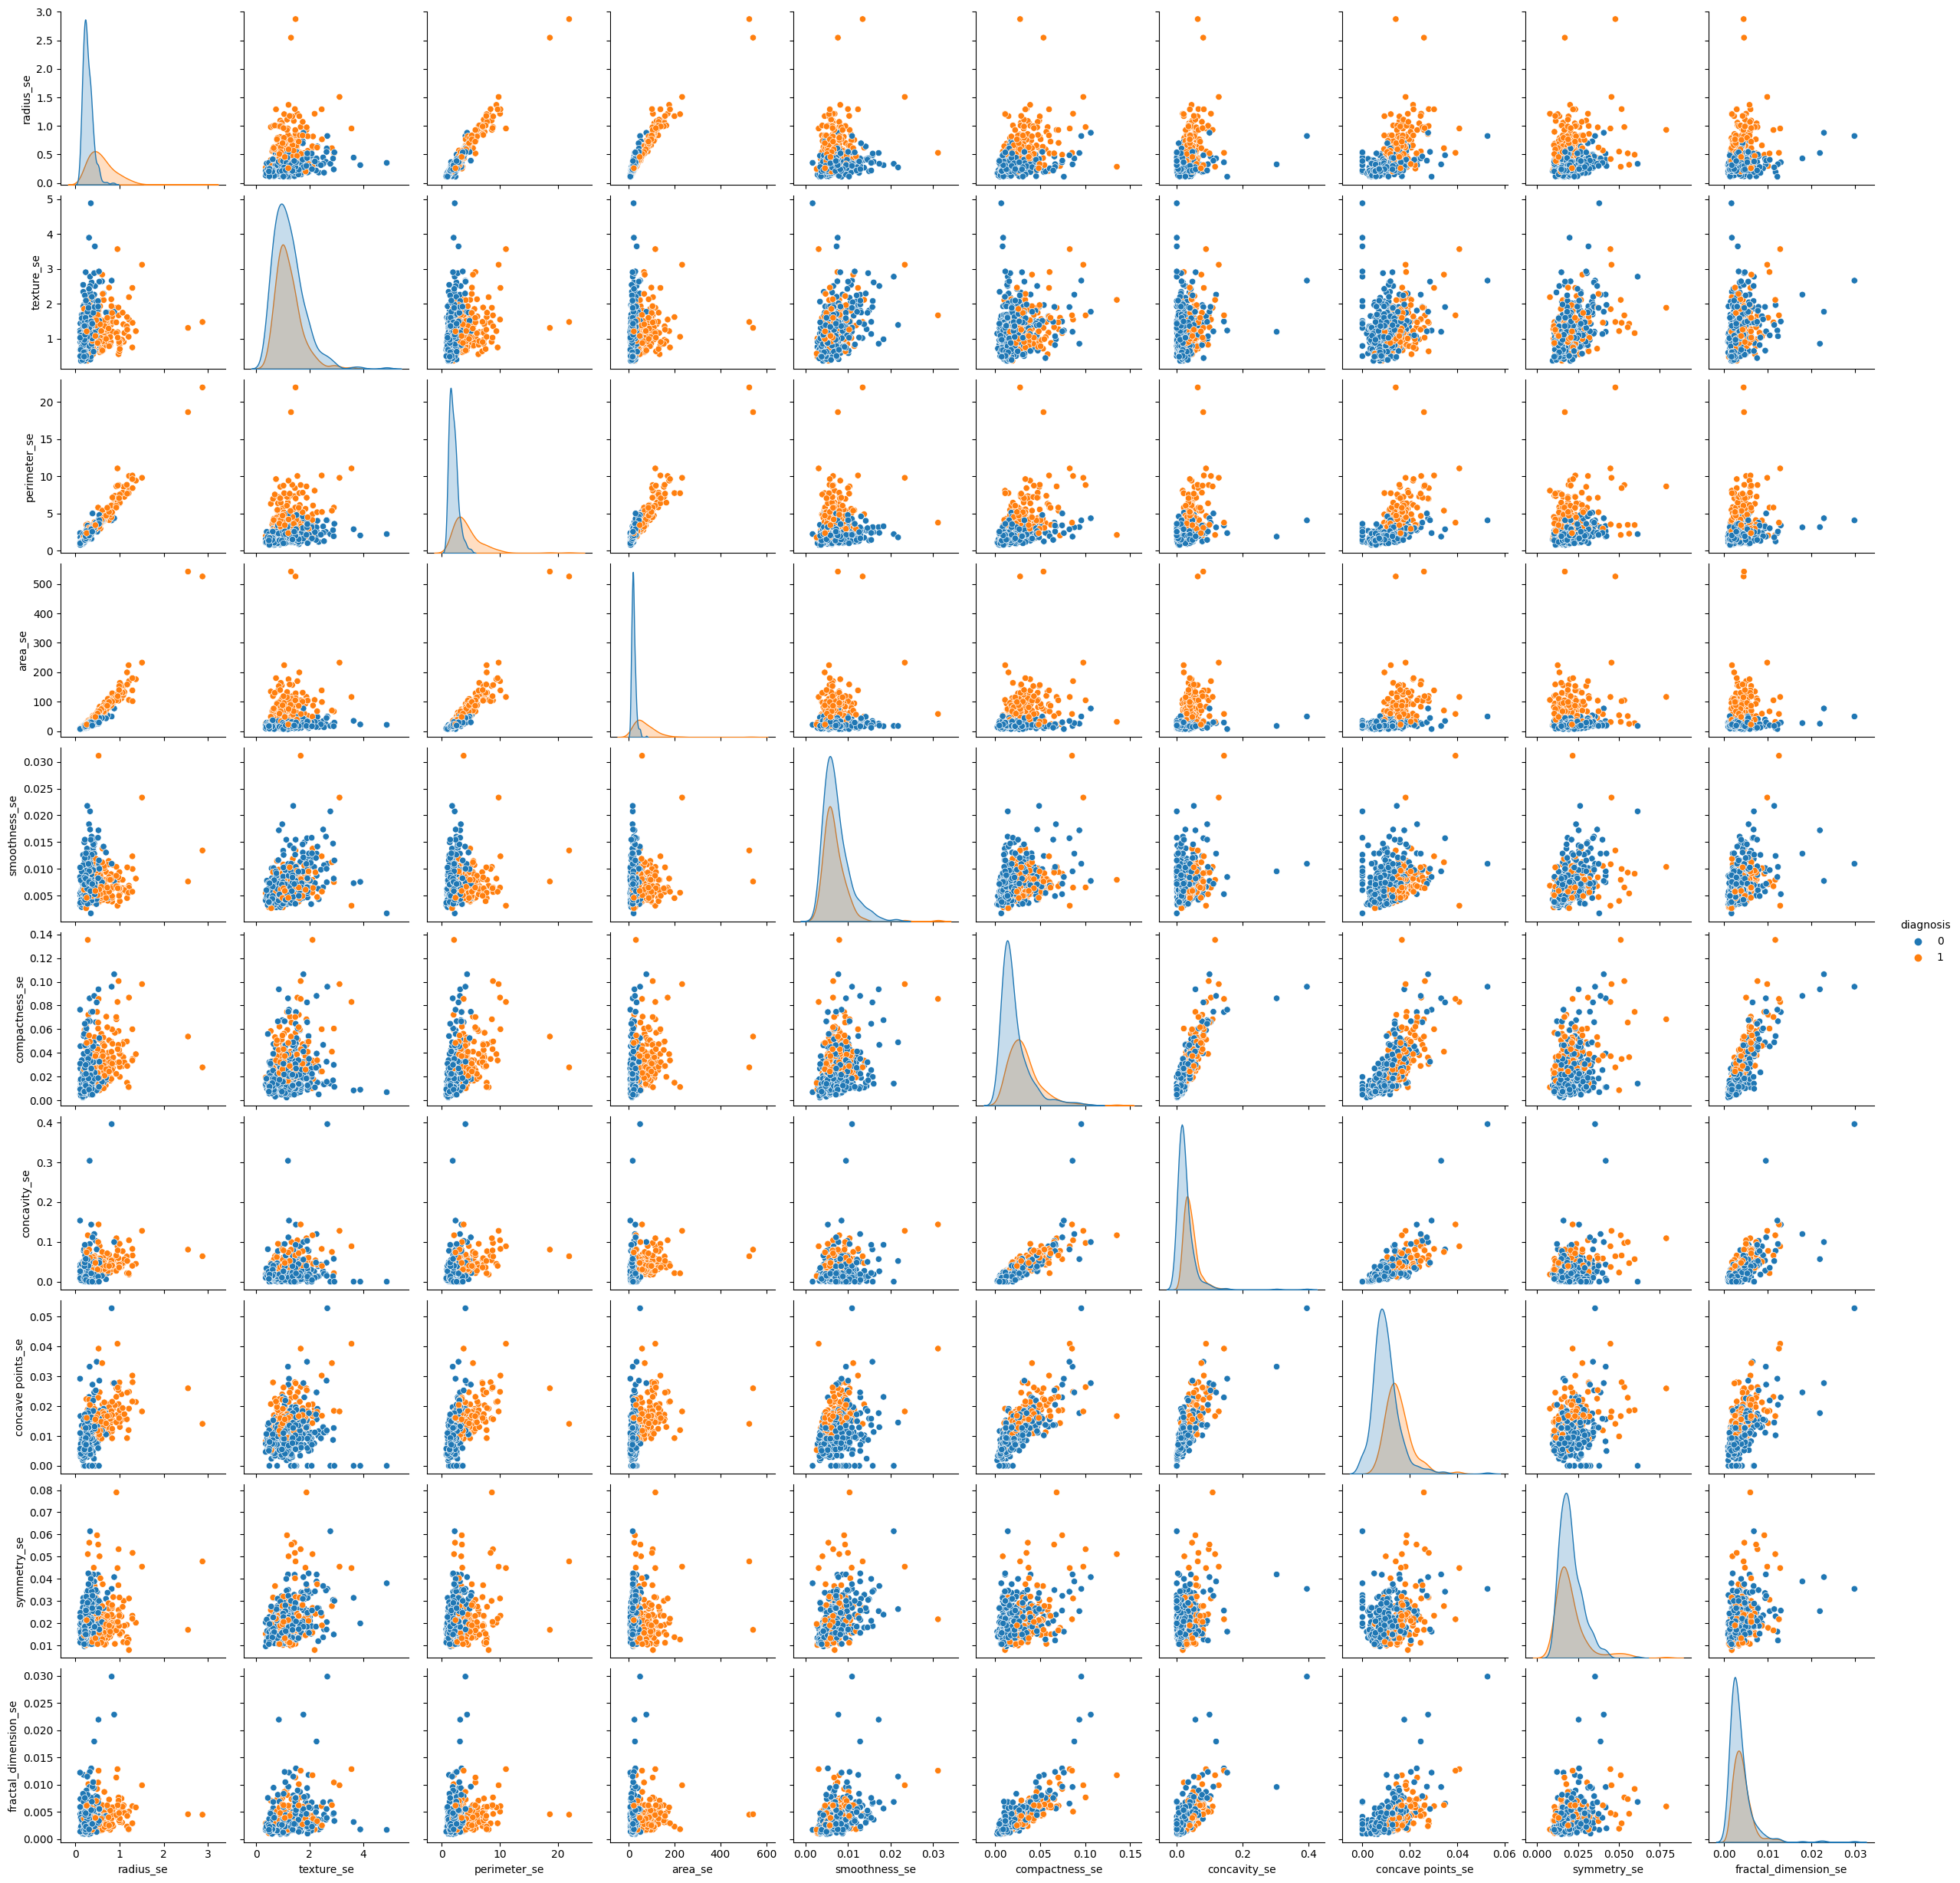

In [23]:
sns.pairplot(df_se_val, hue='diagnosis')

### **Checking the correlation only for with worst values and diagnosis**

In [24]:
df_worst_val = df[['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
df_worst_val.head(5)


diagnosis  radius_worst  texture_worst  perimeter_worst  area_worst  \
0          1         25.38          17.33           184.60     2019.00   
1          1         24.99          23.41           158.80     1956.00   
2          1         23.57          25.53           152.50     1709.00   
3          1         14.91          26.50            98.87      567.70   
4          1         22.54          16.67           152.20     1575.00   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0              0.16               0.67             0.71                  0.27   
1              0.12               0.19             0.24                  0.19   
2              0.14               0.42             0.45                  0.24   
3              0.21               0.87             0.69                  0.26   
4              0.14               0.20             0.40                  0.16   

   symmetry_worst  fractal_dimension_worst  
0            0.46                     0.12  
1            0.28                     0.09  
2            0.36                     0.09  
3            0.66                     0.17  
4            0.24                     0.08

In [25]:
worst_corr = df_worst_val.corr()
worst_corr

diagnosis  radius_worst  texture_worst  \
diagnosis                     1.00          0.78           0.46   
radius_worst                  0.78          1.00           0.36   
texture_worst                 0.46          0.36           1.00   
perimeter_worst               0.78          0.99           0.37   
area_worst                    0.73          0.98           0.35   
smoothness_worst              0.42          0.22           0.23   
compactness_worst             0.59          0.48           0.36   
concavity_worst               0.66          0.57           0.37   
concave points_worst          0.79          0.79           0.36   
symmetry_worst                0.42          0.24           0.23   
fractal_dimension_worst       0.32          0.09           0.22   

                         perimeter_worst  area_worst  smoothness_worst  \
diagnosis                           0.78        0.73              0.42   
radius_worst                        0.99        0.98              0.22   
texture_worst                       0.37        0.35              0.23   
perimeter_worst                     1.00        0.98              0.24   
area_worst                          0.98        1.00              0.21   
smoothness_worst                    0.24        0.21              1.00   
compactness_worst                   0.53        0.44              0.57   
concavity_worst                     0.62        0.54              0.52   
concave points_worst                0.82        0.75              0.55   
symmetry_worst                      0.27        0.21              0.49   
fractal_dimension_worst             0.14        0.08              0.62   

                         compactness_worst  concavity_worst  \
diagnosis                             0.59             0.66   
radius_worst                          0.48             0.57   
texture_worst                         0.36             0.37   
perimeter_worst                       0.53             0.62   
area_worst                            0.44             0.54   
smoothness_worst                      0.57             0.52   
compactness_worst                     1.00             0.89   
concavity_worst                       0.89             1.00   
concave points_worst                  0.80             0.86   
symmetry_worst                        0.61             0.53   
fractal_dimension_worst               0.81             0.69   

                         concave points_worst  symmetry_worst  \
diagnosis                                0.79            0.42   
radius_worst                             0.79            0.24   
texture_worst                            0.36            0.23   
perimeter_worst                          0.82            0.27   
area_worst                               0.75            0.21   
smoothness_worst                         0.55            0.49   
compactness_worst                        0.80            0.61   
concavity_worst                          0.86            0.53   
concave points_worst                     1.00            0.50   
symmetry_worst                           0.50            1.00   
fractal_dimension_worst                  0.51            0.54   

                         fractal_dimension_worst  
diagnosis                                   0.32  
radius_worst                                0.09  
texture_worst                               0.22  
perimeter_worst                             0.14  
area_worst                                  0.08  
smoothness_worst                            0.62  
compactness_worst                           0.81  
concavity_worst                             0.69  
concave points_worst                        0.51  
symmetry_worst                              0.54  
fractal_dimension_worst                     1.00

<AxesSubplot: >

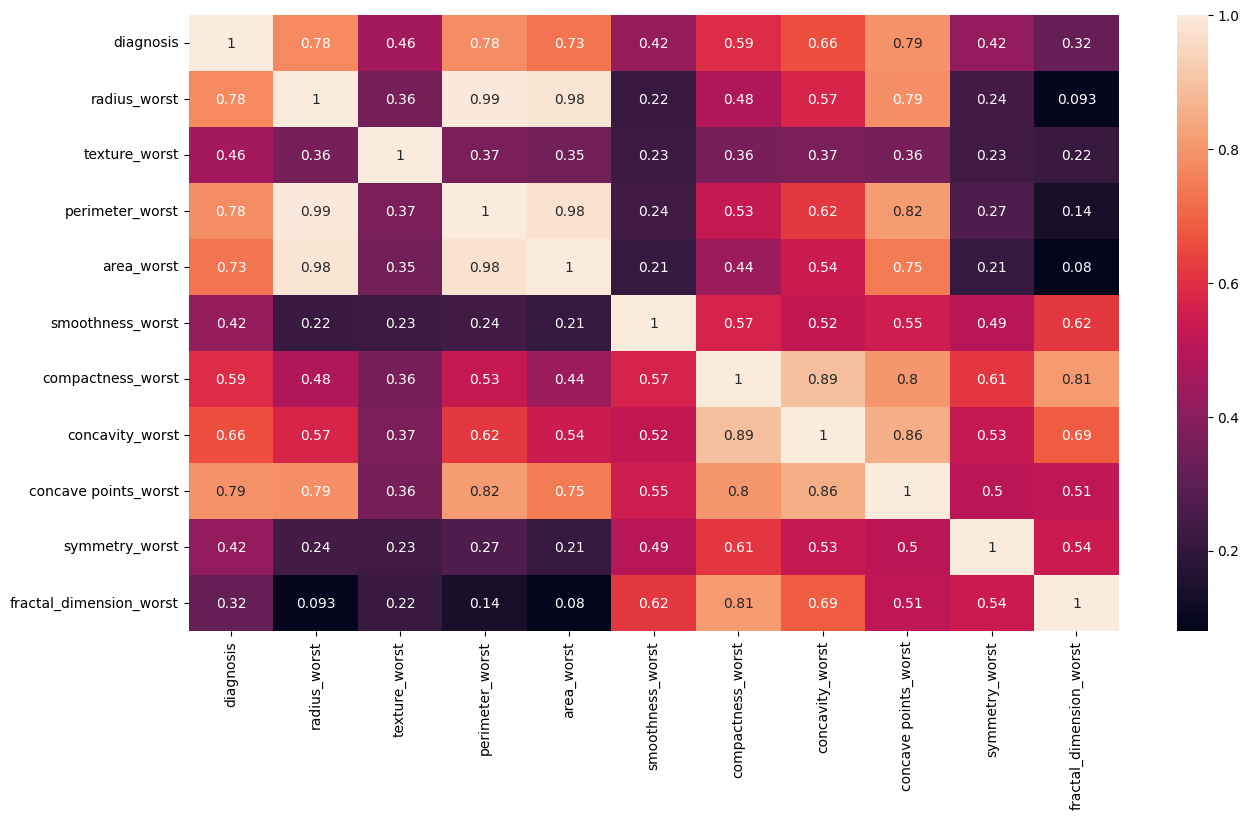

In [26]:
sns.heatmap(worst_corr,annot=True)

#### **Observations**

- area_worst and radius_worst are 98% are correlated
- perimeter_worst and radius_worst are 99% correlated
- area_worst and perimeter_worst are 98% correlated

### **PairPlot**

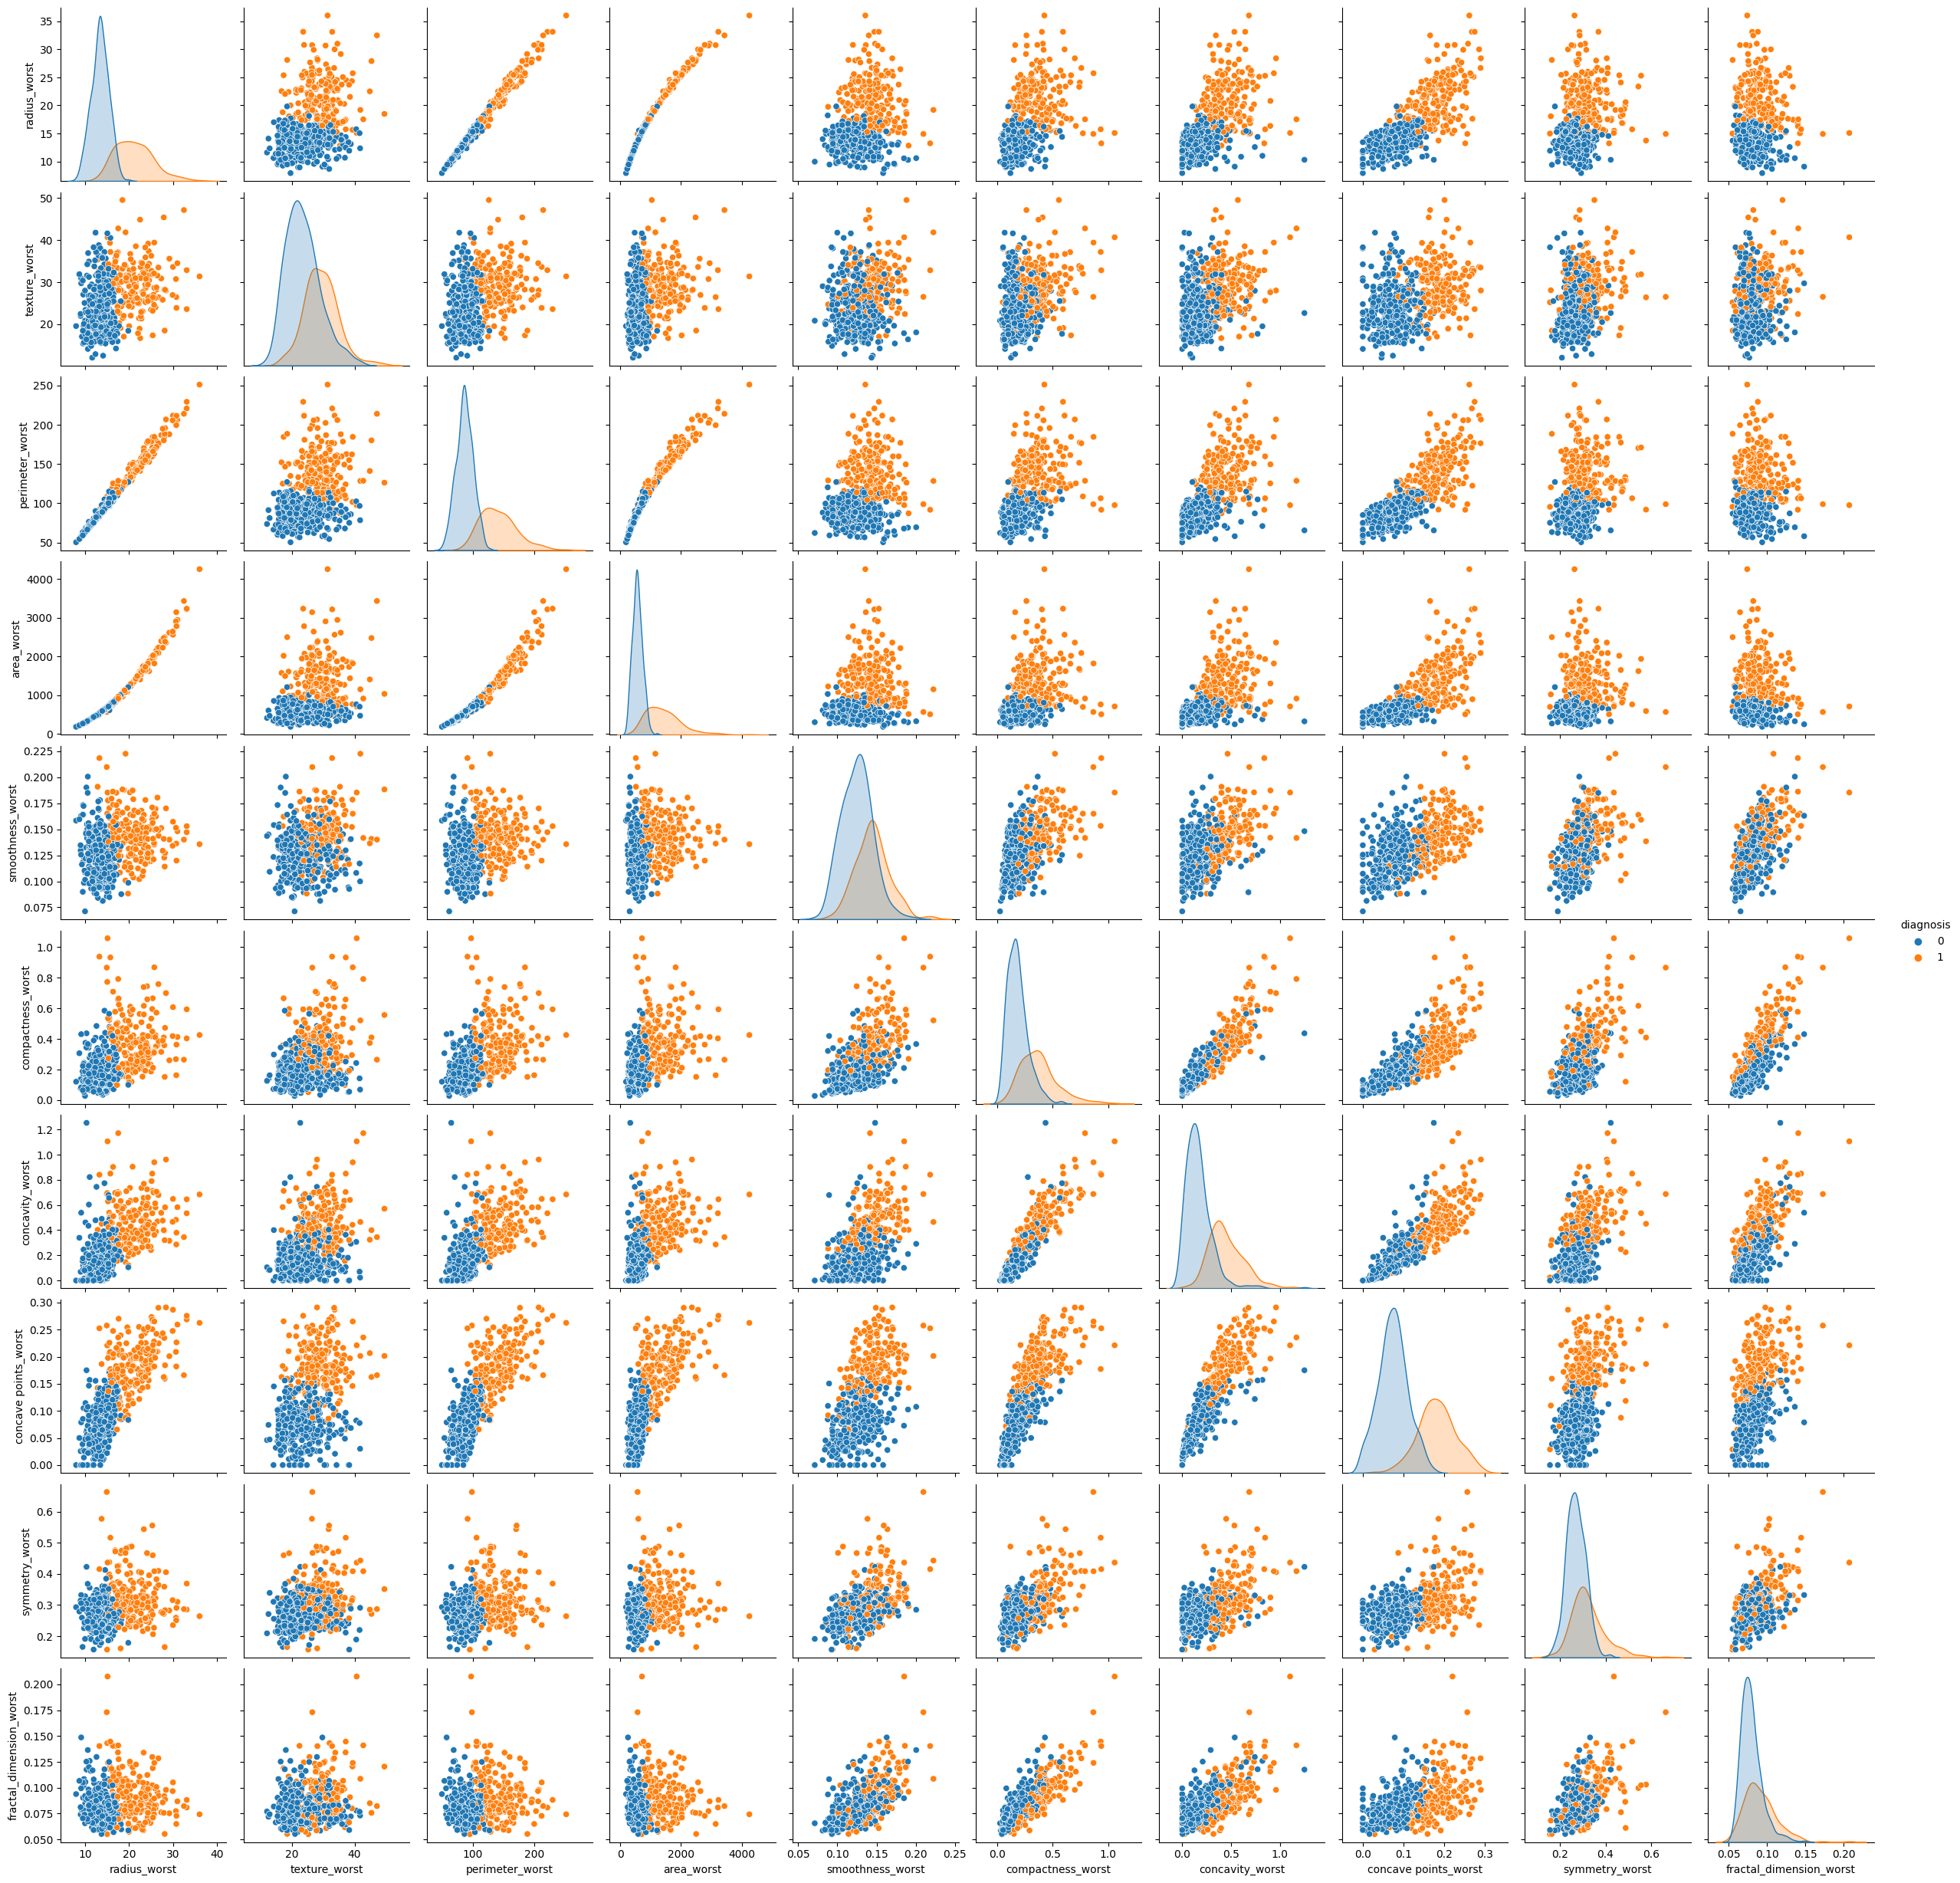

In [27]:
sns.pairplot(df_worst_val, hue='diagnosis')

#### Just observations are made in accordanve with correlation, as of now I am not dropping any correlated columns, I will be using PCA to reduce the dimensionality

## **Splitting the data for training and testing**

In [28]:
X = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
X.shape

(569, 30)

In [29]:
y = df['diagnosis']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [31]:
X.shape, X_train.shape,X_test.shape, y_train.shape, y_test.shape

((569, 30), (455, 30), (114, 30), (455,), (114,))

## **Scaling**

In [32]:
pipe = Pipeline([('scalar', StandardScaler()),
                 ('pca',PCA(n_components=10))])

In [33]:
pipe_Xtrain = pipe.fit_transform(X_train)
pipe_Xtrain.shape

(455, 10)

In [34]:
pipe_Xtest = pipe.transform(X_test)
pipe_Xtest.shape

(114, 10)

In [47]:
import pickle
pickle.dump(pipe, open('piping.pkl', 'wb'))

## **HyperParameter Tuning**

In [35]:
strat_k_fold = StratifiedKFold(n_splits=5)
# Logistic regression
log_reg = LogisticRegression()
lr_param_dist = {'solver':['newton-cg', 'lbfgs', 'liblinear'],
                 'penalty':['none', 'l1', 'l2', 'elasticnet'],
                 'C':[1, 10, 100, 200, 300]}

# Support Vector machine classifier
svc_model = SVC()
svc_params_dist = {'kernel': ['rbf','linear'],
                   'C':[1, 10, 100, 1000],
                   'gamma':[0.001, 0.0001]}

# Decision Tree Clasifier
dt_model = DecisionTreeClassifier()
dt_params_dist = {"criterion": ["gini", "entropy"],
                  "max_depth": [3, None],
                  "max_features": range(1, 9),
                  "min_samples_leaf": range(1, 9),}

# Random Forest 
rf_model = RandomForestClassifier()
rf_params_dist = {'criterion':['gini','entropy'],
                'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

# KNN
knn_model = KNeighborsClassifier()
knn_params_dist = {'n_neighbors': [i for i in range(0,40)],
                   'weights': ['uniform','distance']}

# Naive Bayes
nb_model = GaussianNB()




In [36]:
def randomsearch(model, params, X, y):
    rndm_search = RandomizedSearchCV(model, params, n_iter=500, scoring='accuracy', n_jobs=-1, cv=strat_k_fold, random_state=1)
    result = rndm_search.fit(X, y)
    print(f'Best score for {model} is :{result.best_score_}')
    print(f'Best Hyperparameters for {model} is :{result.best_params_}')

print('The parameters for LOGISTIC REGRESSION')
print('------------------------------------------------')
randomsearch(log_reg, lr_param_dist, pipe_Xtrain, y_train)
print('================================================')

print('The parameters for SVM MODEL')
print('------------------------------------------------')
randomsearch(svc_model, svc_params_dist, pipe_Xtrain, y_train)
print('================================================')

print('The parameters for DECISION TREE CLASSIFIER')
print('------------------------------------------------')
randomsearch(dt_model, dt_params_dist, pipe_Xtrain, y_train)
print('================================================')

print('The parameters for RANDOM FOREST CLASSIFIER')
print('------------------------------------------------')
randomsearch(rf_model, rf_params_dist, pipe_Xtrain, y_train)
print('================================================')

print('The parameters for KNN CLASSIFIER')
print('------------------------------------------------')
randomsearch(knn_model, knn_params_dist, pipe_Xtrain, y_train)
print('================================================')

The parameters for LOGISTIC REGRESSION
------------------------------------------------
Best score for LogisticRegression() is :0.9736263736263735
Best Hyperparameters for LogisticRegression() is :{'solver': 'newton-cg', 'penalty': 'l2', 'C': 1}
The parameters for SVM MODEL
------------------------------------------------
Best score for SVC() is :0.9736263736263735
Best Hyperparameters for SVC() is :{'kernel': 'rbf', 'gamma': 0.001, 'C': 100}
The parameters for DECISION TREE CLASSIFIER
------------------------------------------------
Best score for DecisionTreeClassifier() is :0.9538461538461538
Best Hyperparameters for DecisionTreeClassifier() is :{'min_samples_leaf': 1, 'max_features': 5, 'max_depth': None, 'criterion': 'entropy'}
The parameters for RANDOM FOREST CLASSIFIER
------------------------------------------------
Best score for RandomForestClassifier() is :0.9582417582417582
Best Hyperparameters for RandomForestClassifier() is :{'n_estimators': 230, 'min_samples_split': 2, '

## **Training and predict the test data and evaluation metrics**

In [37]:
# Logistic regrtession
log_reg_fin = LogisticRegression(solver= 'liblinear', penalty='l2', C= 1)
svc_model_fin = SVC( kernel = 'rbf', gamma= 0.001, C= 100)
dt_model_fin = DecisionTreeClassifier(min_samples_leaf= 5, max_features= 8, max_depth= None, criterion= 'gini')
rf_model_fin = RandomForestClassifier(n_estimators= 230, min_samples_split = 5, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 40, criterion= 'entropy', bootstrap= False)
knn_model_fin = KNeighborsClassifier(n_neighbors=15, weights='distance')
nb_model_fin = GaussianNB()

acc_score = []

def model_train(models, X_tr,y_tr):
    model = models
    model.fit(X_tr, y_tr)

def evaluation(actual, predicted):
    con_mat_ = confusion_matrix(actual, predicted)
    print(f'The confusion matrix : \n {con_mat_}')
    acc_ = accuracy_score(actual, predicted)
    print(f'The accuracy score is : \n {acc_}')
    acc_score.append(acc_)
    rprt = classification_report(actual, predicted)
    print(f'The classification report is : \n {rprt}')


print('Evaluation metrics of the LOGISTIC REGRESSION model') 
# Training the model
model_train(log_reg_fin, pipe_Xtrain, y_train)
# predicting the model
log_y_pred = log_reg_fin.predict(pipe_Xtest)
#Evaluation metrics
evaluation(y_test, log_y_pred)

print('Evaluation metrics of the SVM MODEL') 
# Training the model
model_train(svc_model_fin, pipe_Xtrain, y_train)
# predicting the model
svm_y_pred = svc_model_fin.predict(pipe_Xtest)
#Evaluation metrics
evaluation(y_test, svm_y_pred)
    
print('Evaluation metrics of the DECISION TREE CLASSIFIER MODEL') 
# Training the model
model_train(dt_model_fin, pipe_Xtrain, y_train)
# predicting the model
dt_y_pred = dt_model_fin.predict(pipe_Xtest)
#Evaluation metrics
evaluation(y_test, dt_y_pred)

print('Evaluation metrics of the RANDOM FOREST CLASSIFIER MODEL') 
# Training the model
model_train(rf_model_fin, pipe_Xtrain, y_train)
# predicting the model
rf_y_pred = rf_model_fin.predict(pipe_Xtest)
#Evaluation metrics
evaluation(y_test, rf_y_pred)

print('Evaluation metrics of the KNN CLASSIFIER MODEL') 
# Training the model
model_train(knn_model_fin, pipe_Xtrain, y_train)
# predicting the model
knn_y_pred = knn_model_fin.predict(pipe_Xtest)
#Evaluation metrics
evaluation(y_test, knn_y_pred)

print('Evaluation metrics of the GAUSSIAN NB CLASSIFIER MODEL') 
# Training the model
model_train(nb_model_fin, pipe_Xtrain, y_train)
# predicting the model
nb_y_pred = nb_model_fin.predict(pipe_Xtest)
#Evaluation metrics
evaluation(y_test, nb_y_pred)


Evaluation metrics of the LOGISTIC REGRESSION model
The confusion matrix : 
 [[69  0]
 [ 3 42]]
The accuracy score is : 
 0.9736842105263158
The classification report is : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        69
           1       1.00      0.93      0.97        45

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Evaluation metrics of the SVM MODEL
The confusion matrix : 
 [[69  0]
 [ 2 43]]
The accuracy score is : 
 0.9824561403508771
The classification report is : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        69
           1       1.00      0.96      0.98        45

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Evaluation met

In [38]:
acc_score

[0.9736842105263158,
 0.9824561403508771,
 0.9298245614035088,
 0.9736842105263158,
 0.9824561403508771,
 0.9298245614035088]

In [39]:
model_acc_score = {'LOGISTIC REGRESSION':acc_score[0] , 'SVM MODEL': acc_score[1], 'DECISION TREE': acc_score[2], 
                    'RANDOM FOREST':acc_score[3], 'KNN MODEL':acc_score[4], 'NAIVE BAYES':acc_score[5]}
acc_scr_df= pd.DataFrame(model_acc_score, index=['Accuracy'])
acc_scr_df

LOGISTIC REGRESSION  SVM MODEL  DECISION TREE  RANDOM FOREST  \
Accuracy                 0.97       0.98           0.93           0.97   

          KNN MODEL  NAIVE BAYES  
Accuracy       0.98         0.93

<AxesSubplot: >

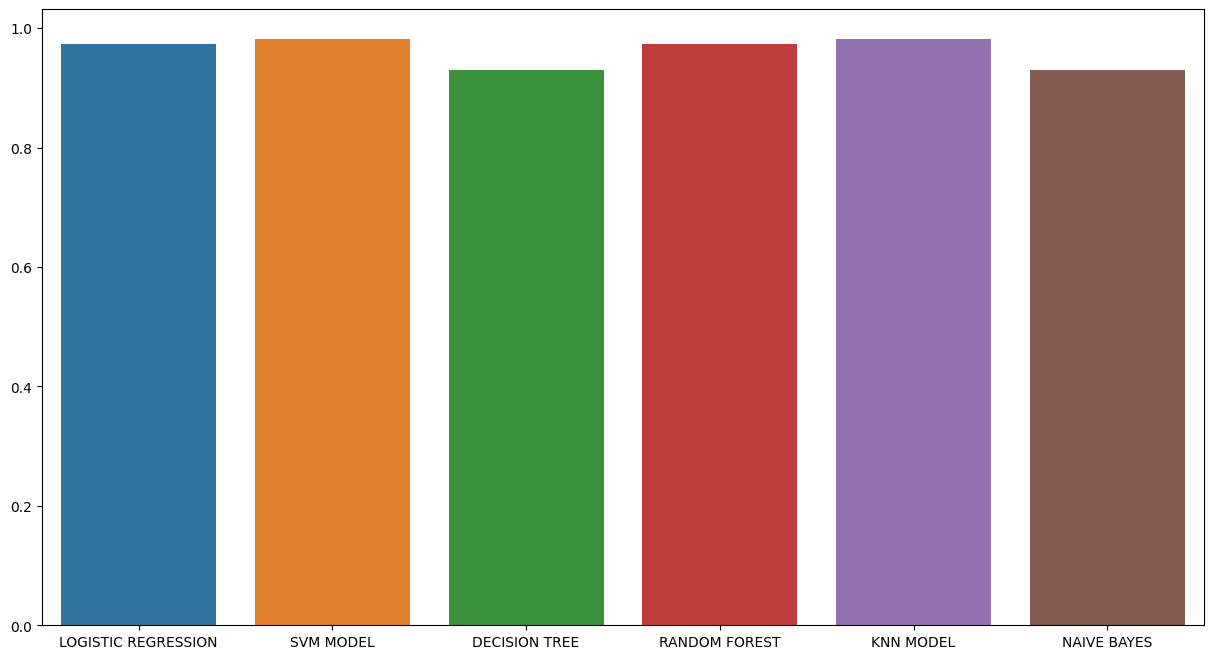

In [40]:
sns.barplot(acc_scr_df)

## **Building a predictive system**

In [41]:
input = [19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758]

input_array = np.asarray(input)

resh_input = input_array.reshape(1,-1)

scaled_input = pipe.transform(resh_input)

svc_model_fin.predict(scaled_input)

# scaled_input.reshape(1,-1)

array([1])

## **Pickling the model file for deployement**

In [42]:
import pickle

In [43]:
pickle.dump(svc_model_fin,open('classifiers.pkl','wb'))

In [44]:
pickle_model = pickle.load(open('classifiers.pkl','rb'))

In [45]:
pickle_model.predict(scaled_input)

array([1])